Implement the fragmentation scheme in reverse to 'grow' some particles.

### Cozar Scheme

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [10]:
def fragmentation_event(L, k, fragmentation_mode):
    """
    L: lenght of cube
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_L = L*fragmentation_mode
    k += 1
    
    return new_L, k

In [11]:
def fix_mode(V, fragmentation_mode):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_V = V/fragmentation_mode
   
    return new_V

def random_mode(V):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    n = V.shape[0]
    fragmentation_mode = np.random.rand(n)
    print(fragmentation_mode)
    new_V = V/fragmentation_mode
    
    return new_V

In [12]:
np.random.choice([8, 4, 2, 1], p=np.array([8/14.5, 4/14.5, 2/14.5, 0.5/14.5]))

8

In [222]:
def frag_vec(n, dt,  fragmentation_timescale, mode):
    
    fragmentation_mode = np.ones(n)
    frag_prob = math.exp(-abs(dt)/(fragmentation_timescale))
    frag_prob = np.ones(n)*frag_prob
    rnd_num = np.random.rand(n)
    
    truth = rnd_num  > frag_prob
    
    if mode == 'rand':
        fragmentation_mode = np.random.rand(n)*truth + ~truth
        
    elif mode == 'fix':
        fragmentation_mode = 1/2*truth + ~truth
        
    elif mode == 'Mika':
        raw_mode = np.random.choice([8, 4, 2, 1], size=n, p=np.array([8/14.5, 4/14.5, 2/14.5, 0.5/14.5]))
        fragmentation_mode = 1/raw_mode*truth + ~truth
        
    return fragmentation_mode

In [234]:
frag_vec(10000, 0.1, 1, 'Mika')

array([1.  , 1.  , 1.  , ..., 0.25, 1.  , 1.  ])

In [14]:
def fragmentation(V, dt, fragmentation_timescale, mode):
    """
    mode: 'rand' or 'fix'.
    """
    n = V.shape[0]
    print(n)
    fragmentation_prob = math.exp(-dt/(fragmentation_timescale))
    rnd_num = np.random.rand(n)
    
    if rnd_num > fragmentation_prob and mode == 'rand':
        V = random_mode(V)
        
    elif rnd_num > fragmentation_prob and mode == 'fix':
        V = fix_mode(V, 1/2)

        
    return V

In [15]:
def logistic_map(x, r):
    x_1 = r*x*(1 - x)
    
    return x_1

# Settling velocity

In [17]:
def sinkingVelocity(radius, β, ν):
    alpha = radius
    g = 9.81
  
    tau_p = alpha*alpha/(3*β*ν)
    
    v_s = (1 - β)*g*tau_p
        
    
    return v_s

# Experiment 

In [18]:
np.zeros(40) > 2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [19]:
np.linspace(10, 0, 11)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

In [20]:
r = 5e-8 # 100nm
k = 0
sim_time = 100 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 1000
frag_mode = 1/2
k = 0
particles = 10000
initial_depth = 5000

time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

radiuses_rand = np.zeros((particles, N))
volumes_rand = np.zeros((particles, N))

radiuses_fix = np.zeros((particles, N))
volumes_fix = np.zeros((particles, N))

length_3d = np.zeros((particles, N))
volumes_3d = np.zeros((particles, N))
depth_3d = np.zeros((particles, N)) + 5000

radiuses_rand[:, 0] = r
volumes_rand[:, 0] = V

radiuses_fix[:, 0] = r
volumes_fix[:, 0] = V

length_3d[:, 0] = r
volumes_3d[:, 0] = (r)**3

for i in range(N-1):
    vr = volumes_rand[:, i]
    vf = volumes_fix[:, i]
    volumes_rand[:, i+1] = frag_vec(vr , dt, frag_timescale, 'rand')
    volumes_fix[:, i+1] = frag_vec(vf, dt, frag_timescale, 'fix')
    
    radiuses_rand[:, i+1] = np.cbrt(3*volumes_rand[:, i+1]/(4*np.pi))
    radiuses_fix[:, i+1] = np.cbrt(3*volumes_fix[:, i+1]/(4*np.pi))
    
    l = length_3d[:, i]
    depth_3d[:, i+1] = depth_3d[:, i] - sinkingVelocity(l, 0.8, 1e-6)*dt
    
    length_3d[:, i+1] = frag_vec(l, dt, frag_timescale, '3D')
    volumes_3d[:, i+1] = length_3d[:, i+1]**3

[]

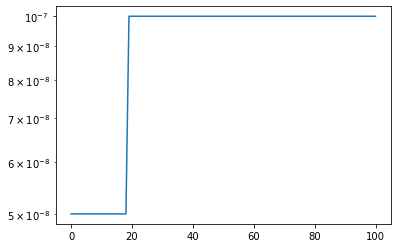

In [21]:
plt.plot(length_3d[1,:])
plt.semilogy()

In [22]:
mean_rand = np.mean(radiuses_rand, axis=0)
mean_vol_rand = np.mean(volumes_rand, axis=0)

mean_fix = np.mean(radiuses_fix, axis=0)
mean_vol_fix = np.mean(volumes_fix, axis=0)

mean_3D = np.mean(length_3d, axis=0)
mean_vol_3D = np.mean(volumes_3d, axis=0)

mean_depth = np.mean(depth_3d, axis=0)
std_depth = np.std(depth_3d, axis=0)


[]

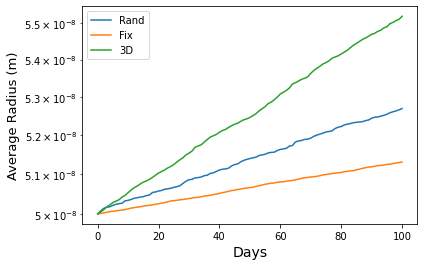

In [23]:
plt.plot(time, mean_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Average Radius (m)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

[]

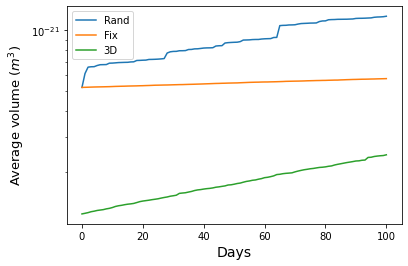

In [24]:
plt.plot(time, mean_vol_rand, label=r'Rand')
# plt.fill_between(time, mean_rand + std_rand, mean_rand, alpha=0.2, color='b')
# plt.fill_between(time, mean_rand , mean_rand - std_rand, alpha=0.2, color='b')

plt.plot(time, mean_vol_fix, label=r'Fix')
# plt.fill_between(time, mean_fix + std_fix, mean_fix, alpha=0.2, color='orange')
# plt.fill_between(time, mean_fix , mean_fix - std_fix, alpha=0.2, color='orange')

plt.plot(time, mean_vol_3D, label='3D')

plt.xlabel('Days', fontsize=14)
plt.ylabel(r'Average volume ($m^3$)', fontsize=13)
plt.legend(loc='upper left')
plt.semilogy()

In [25]:
size_dist, binss = np.histogram(length_3d[:, -1], bins=np.logspace(-8, -5, 30))
size_dist_fix, _ = np.histogram(radiuses_fix[:, -1], bins=np.logspace(-8, -5, 30))
size_dist_rand, _ = np.histogram(radiuses_rand[:, -1], bins=np.logspace(-8, -5, 30))

In [26]:
binss

array([1.00000000e-08, 1.26896100e-08, 1.61026203e-08, 2.04335972e-08,
       2.59294380e-08, 3.29034456e-08, 4.17531894e-08, 5.29831691e-08,
       6.72335754e-08, 8.53167852e-08, 1.08263673e-07, 1.37382380e-07,
       1.74332882e-07, 2.21221629e-07, 2.80721620e-07, 3.56224789e-07,
       4.52035366e-07, 5.73615251e-07, 7.27895384e-07, 9.23670857e-07,
       1.17210230e-06, 1.48735211e-06, 1.88739182e-06, 2.39502662e-06,
       3.03919538e-06, 3.85662042e-06, 4.89390092e-06, 6.21016942e-06,
       7.88046282e-06, 1.00000000e-05])

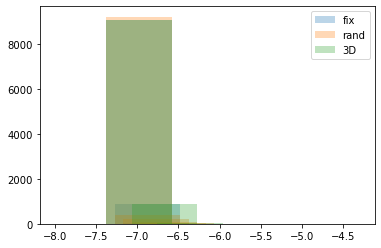

In [27]:
plt.bar(np.log10(binss[0:-1]), size_dist_fix, align='edge', alpha=0.3, label='fix')
plt.bar(np.log10(binss[0:-1]), size_dist_rand, align='edge', alpha=0.3, label='rand')
plt.bar(np.log10(binss[0:-1]), size_dist, align='edge', alpha=0.3, label='3D')
plt.legend()


In [28]:
8/14.5

0.5517241379310345

# Average time it take the particle to reach the surface

In [31]:
v_s = sinkingVelocity(length_3d, 0.8, 1e-6)

In [32]:
mean_rand = np.mean(radiuses_rand, axis=0)
mean_vol_rand = np.mean(volumes_rand, axis=0)

mean_fix = np.mean(radiuses_fix, axis=0)
mean_vol_fix = np.mean(volumes_fix, axis=0)

mean_3D = np.mean(length_3d, axis=0)
mean_vol_3D = np.mean(volumes_3d, axis=0)


# Sensibility to dt

In [33]:
DTs = np.logspace(1e-5, 10, 10001)

In [34]:
frag_timescale = 1000

In [35]:
frag_probas  = np.exp(-DTs/(frag_timescale))

In [38]:
dT = np.array([1,60, 1, 24, 240])
frag_probas_scat  = np.exp(-dT/(frag_timescale))

Text(0, 0.5, 'Fragmentation Probability')

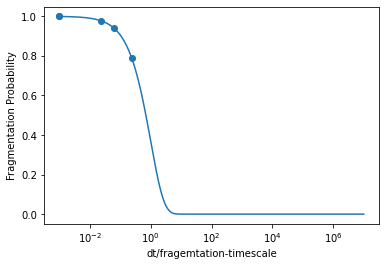

In [39]:
plt.semilogx(DTs/frag_timescale, frag_probas)
plt.scatter(dT/frag_timescale, frag_probas_scat)
plt.xlabel('dt/fragemtation-timescale')
plt.ylabel('Fragmentation Probability')

# time it take a particle to reach the surface

In [78]:
# parameters
r = 5e-8 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 100
frag_mode = 1/2
k = 0
particles = 1000
initial_depth = 5000
β = 0.8
ν = 1e-6

# Da Arrais
time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

lengthxx = np.linspace(1e-7, 1e-5, particles)
vsxx = sinkingVelocity(lengthxx,β, ν)
depthxx = np.zeros(particles) + initial_depth
agexx = np.zeros(particles)

timescalexx = initial_depth/vsxx

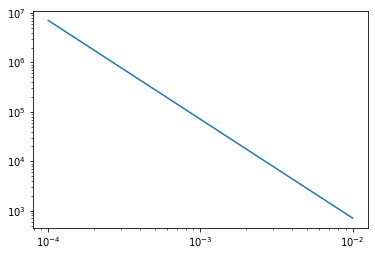

In [80]:
plt.loglog(lengthxx*1000, timescalexx/(60*60*24))

# sensitivity to fragmentation timescales 

In [238]:
# parameters
r = 5e-5 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 10
frag_mode = 1/2
k = 0
particles = 10000
initial_depth = 2000
β = 0.8
ν = 1e-6

# Da Arrais
time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

lengthxx = np.zeros(particles)
depthxx = np.zeros(particles) + initial_depth
agexx = np.zeros(particles)

lengthxx[:] = r
online = sum(depthxx > 20)

i = 0
while online != 0:
    truth = depthxx > 1500
    length_lim = lengthxx < 1e-3
    
    depthxx = depthxx - sinkingVelocity(lengthxx, β, ν)*dt*truth
    modexx = frag_vec(particles, dt, frag_timescale, 'Mika')
    lengthxx = lengthxx*(1 + (1/modexx - 1)*length_lim)
    agexx = agexx + 1*truth
    online = sum(truth)
    i += 1

# multiple fragmetation timescales

A bit slow. Try writing this in Julia

In [274]:
# parameters
r = 5e-5 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time + 1
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = np.array([10, 100])
frag_mode = 1/2
k = 0
particles = 10000
initial_depth = 1000
β = 0.8
ν = 1e-6

time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

frag_timescale = np.linspace(100, 5001, 25) #np.array([1, 10, 100, 1000])
mean_timescales = []
std_timescales = []
median_timescales = []

for frag_t in frag_timescale:
    print(frag_t)
    lengthxx = np.zeros(particles)
    depthxx = np.zeros(particles) + initial_depth
    agexx = np.zeros(particles)
    lengthxx[:] = r
    online = sum(depthxx > 20)
    
    while online != 0:
        truth = depthxx > 0
        length_lim = lengthxx < 1e-3
        depthxx = depthxx - sinkingVelocity(lengthxx, β, ν)*dt*truth
        modexx = frag_vec(particles, dt, frag_t, 'Mika')
        lengthxx = lengthxx*(1 + (1/modexx - 1)*length_lim)
        agexx = agexx + 1*truth
        online = sum(truth)
        
    mean_timescales.append(np.mean(agexx))
    std_timescales.append(np.std(agexx))
    median_timescales.append(np.median(agexx))
    

100.0
304.20833333333337
508.4166666666667
712.625
916.8333333333334
1121.0416666666667
1325.25
1529.4583333333335
1733.6666666666667
1937.875
2142.0833333333335
2346.291666666667
2550.5
2754.7083333333335


KeyboardInterrupt: 

In [286]:
mean_timescales = np.array(mean_timescales)
median_timescales = np.array(median_timescales)
std_timescales = np.array(std_timescales)

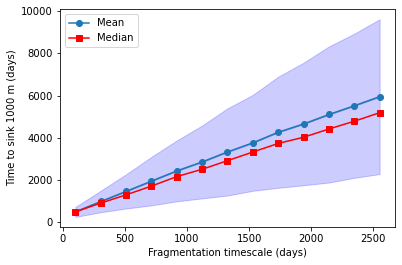

In [304]:
plt.plot(frag_timescale[:13], mean_timescales, 'o-', label='Mean')
plt.plot(frag_timescale[:13], median_timescales, 'rs-', label='Median')
plt.fill_between(frag_timescale[:13], mean_timescales, mean_timescales + std_timescales, alpha=0.2, color='b')
plt.fill_between(frag_timescale[:13], mean_timescales, mean_timescales - std_timescales, alpha=0.2, color='b')

plt.xlabel('Fragmentation timescale (days)')
plt.ylabel('Time to sink 1000 m (days)')

plt.legend(loc='upper left')

In [254]:
mean_timescales

[257.273, 275.0616, 490.0442, 2618.3381]

In [255]:
mean_timescales

[257.273, 275.0616, 490.0442, 2618.3381]